# Decision trees for regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import utils
import matplotlib.pyplot as plt

In [2]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]

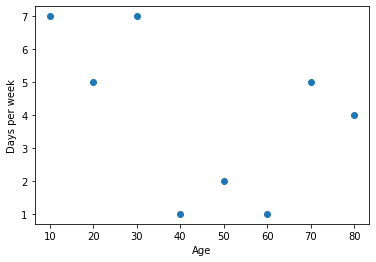

In [3]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [4]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

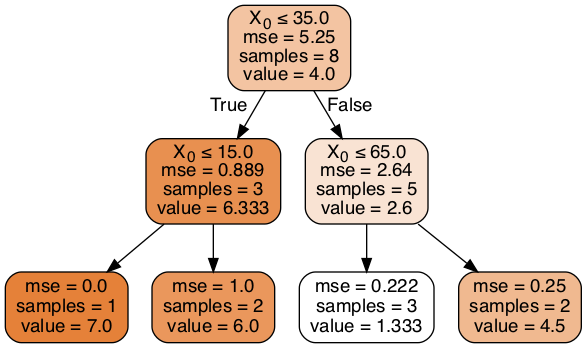

In [5]:
utils.display_tree(dt_regressor)

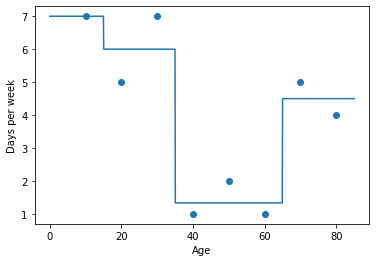

In [6]:
utils.plot_regressor(dt_regressor, features, labels)

# Finding the first split by mimizing the MSE

In [7]:
for i in range(0,9):
    left = np.array(labels[:i])
    right = np.array(labels[i:])
    print("*****")
    print(left, right)
    print(np.mean(left), np.mean(right))
    left_tse = left-np.mean(left)
    right_tse = right-np.mean(right)
    print(1/8*(np.dot(left_tse, left_tse) + np.dot(right_tse, right_tse)))

*****
[] [7 5 7 1 2 1 5 4]
nan 4.0
5.25
*****
[7] [5 7 1 2 1 5 4]
7.0 3.5714285714285716
3.9642857142857144
*****
[7 5] [7 1 2 1 5 4]
6.0 3.3333333333333335
3.916666666666667
*****
[7 5 7] [1 2 1 5 4]
6.333333333333333 2.6
1.9833333333333334
*****
[7 5 7 1] [2 1 5 4]
5.0 3.0
4.25
*****
[7 5 7 1 2] [1 5 4]
4.4 3.3333333333333335
4.983333333333333
*****
[7 5 7 1 2 1] [5 4]
3.8333333333333335 4.5
5.166666666666667
*****
[7 5 7 1 2 1 5] [4]
4.0 4.0
5.25
*****
[7 5 7 1 2 1 5 4] []
4.0 nan
5.25


/Users/cpicon/PycharmProjects/manning/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cpicon/PycharmProjects/manning/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
1/8*(
    (7-3.833)**2 +
    (5-3.833)**2 +
    (7-3.833)**2 +
    (1-3.833)**2 +
    (2-3.833)**2 +
    (1-3.833)**2 +
    (5-4.5)**2 +
    (4-4.5)**2)

5.16666675

In [9]:
np.array([7,5,7,1,2,1,5,4]).mean()

4.0